In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
cv2.__version__

'4.5.1'

In [3]:
img=cv2.imread('/home/pkumari/Downloads/Pics/panda13.jpg',cv2.IMREAD_GRAYSCALE)
img.shape

(759, 759)

In [4]:
img

array([[246, 242, 240, ..., 244, 243, 243],
       [255, 253, 252, ..., 253, 252, 252],
       [ 87,  83,  83, ...,  81,  80,  80],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [252, 252, 252, ..., 251, 251, 251]], dtype=uint8)

In [5]:
img=pd.DataFrame(img)
img.to_excel('/home/pkumari/Downloads/Pics/panda_gray.xlsx',index=False)

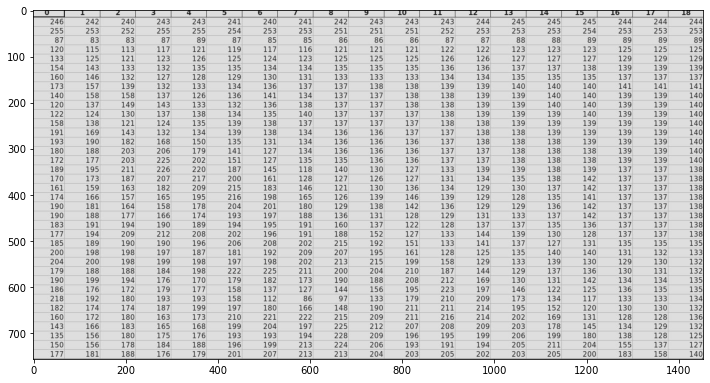

In [6]:
img_pixel=cv2.imread('/home/pkumari/Downloads/Pics/panda_grayscale.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(12,10))
img_pixel=cv2.cvtColor(img_pixel,cv2.COLOR_BGR2RGB)
plt.imshow(img_pixel)

plt.show()

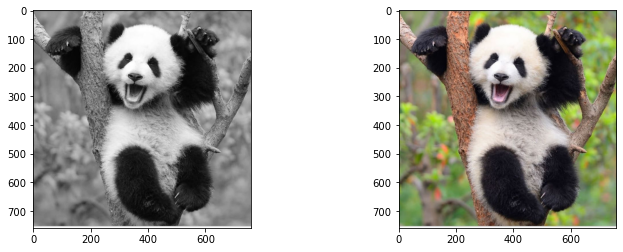

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
img=cv2.imread('/home/pkumari/Downloads/Pics/panda13.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')


plt.subplot(1,2,2)
img=cv2.imread('/home/pkumari/Downloads/Pics/panda13.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

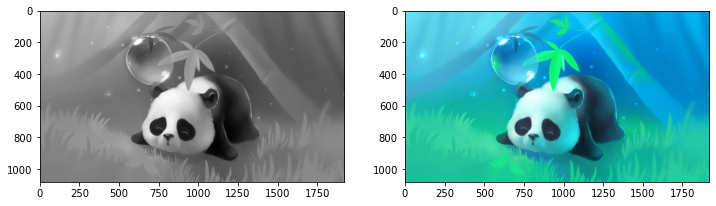

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
img=cv2.imread('/home/pkumari/Downloads/Pics/panda3.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

plt.subplot(1,2,2)
img=cv2.imread('/home/pkumari/Downloads/Pics/panda3.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

plt.show()

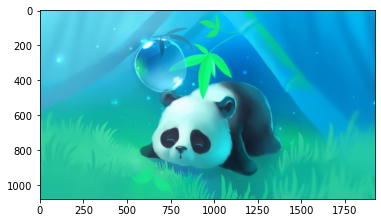

In [9]:
plt.imshow(img)
plt.show()

In [10]:
#cropping the face through indexing

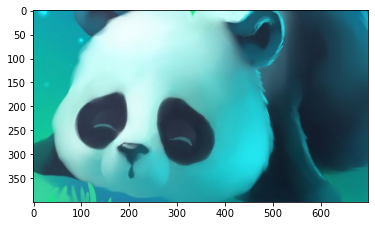

In [11]:
plt.imshow(img[500:900,600:1300])
plt.show()

## Alternative representation of RGB
### Images HSL(hue,s aturation,lightness)
### HSV/HSB(hue,saturation,value/brightness)

In [12]:
#Other properties of Images
#Blackand White TV
img_low_contrast=cv2.imread('/home/pkumari/Downloads/Pics/panda3.jpg',cv2.IMREAD_GRAYSCALE)
img_hist=cv2.calcHist(img_low_contrast,[1],None,[16],[0,255])

### Observations:
Here we are plotting the graph of histogram which tell how much contrast has spread with how much range in between 
And then spreading it using Equalizer and changing the image as sharp Image

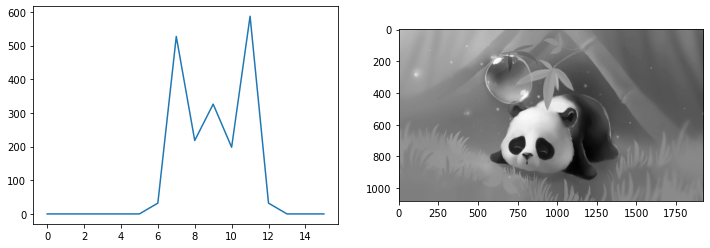

In [13]:
#low_contrast image
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(img_hist)
plt.subplot(1,2,2)
plt.imshow(img_low_contrast,cmap='gray')

plt.show()

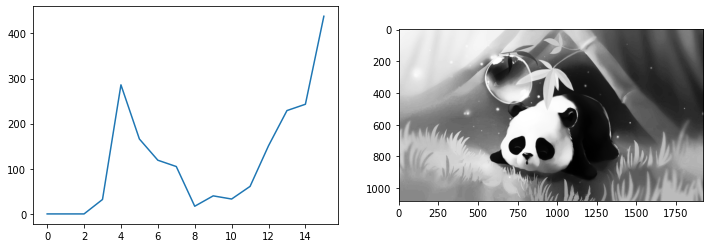

In [14]:
#sharp image
img_contrast_corrected=cv2.equalizeHist(img_low_contrast)
img_hist_corrected=cv2.calcHist(img_contrast_corrected,[0],None,[16],[0,255])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(img_hist_corrected)
plt.subplot(1,2,2)
plt.imshow(img_contrast_corrected,cmap='gray')
plt.show()

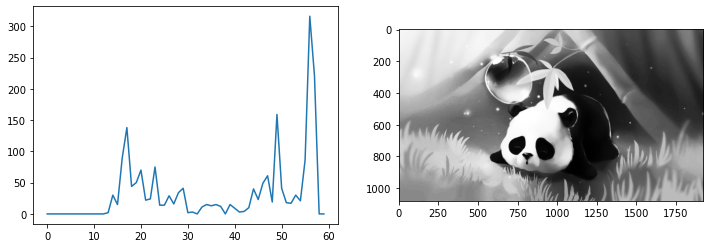

In [15]:
img_contrast_corrected=cv2.equalizeHist(img_low_contrast)
img_hist_corrected=cv2.calcHist(img_contrast_corrected,[3],None,[60],[0,255])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(img_hist_corrected)
plt.subplot(1,2,2)
plt.imshow(img_contrast_corrected,cmap='gray')
plt.show()

## <font color='Green'>Reading a Video</font>
So, first up, what is a video? A video is a sequence of fast moving images. The obvious question that follows is how fast are the pictures moving? The measure of how fast the images are transitioning is given by a metric called frames per second(FPS).

When someone says that the video has an FPS of 40, it means that 40 images are being displayed every second. Alternatively, after every 25 milliseconds, a new frame is displayed.
The other important attributes are the width and height of the frame.

In OpenCV, a video can be read either by using the feed from a camera connected to a computer or by reading a video file. The first step towards reading a video file is to create a VideoCapture object. Its argument can be either the device index or the name of the video file to be read.

In [27]:
#creating a object
vcap=cv2.VideoCapture('/home/pkumari/Downloads/CNN-Industry_Apllication/SampleVideo/samplevideo.mp4')
count=0

In [17]:
#frames per second
vcap.get(cv2.CAP_PROP_FPS)

30.140507956207614

In [18]:
#getting Frame Counts in a video
length=int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

68


In [19]:
#ret=boolean,if video is getting read or not
#frame=kind of image 
ret,frame=vcap.read()

In [20]:
#A boolean method,there is nothing left on video
ret

True

In [21]:
#Run a video
count=0
frame_num=[]
while vcap.isOpened():
    ret,frame=vcap.read()
    if ret:
        cv2.imshow('Frame',frame)
        if cv2.waitKey(25) & 0xFF==ord('q'):
            break
    else:
        break
vcap.release()
cv2.destroyAllWindows()

In [28]:
#storing frames in a directory after readin video
count=0
frame_num=[]
while vcap.isOpened():
    ret,frame=vcap.read()
    if ret:
        frame_count="frame_"+str(count)+".jpg"
        cv2.imwrite(os.path.join('/home/pkumari/Downloads/CNN-Industry_Apllication/SampleVideo/interim_video/',frame_count),frame)
        frame_num.append(frame_count)
        count+=1
        vcap.set(1,count)
    else:
        vcap.release()
        break

In [31]:
all_img=[cv2.cvtColor(cv2.imread(os.path.join('/home/pkumari/Downloads/CNN-Industry_Apllication/SampleVideo/interim_video/',x)),cv2.COLOR_BGR2GRAY)
for x in frame_num]

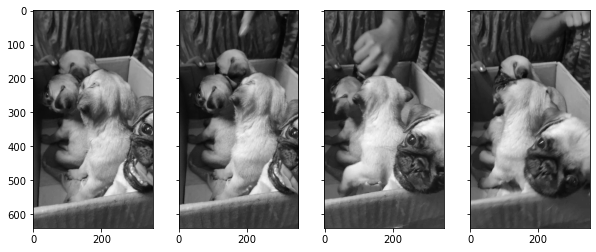

In [83]:
images=[all_img[20],all_img[30],all_img[50],all_img[67]]
f, axes = plt.subplots(1, 4, sharey=True)
f.set_figwidth(10)
for ax,image in zip(axes, images):
    ax.imshow(image,cmap='gray')

In [85]:
kernel=np.ones((10,10))
kernel

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [87]:
diff=all_img[20]-all_img[40]
diff




array([[  2,   3,   1, ...,  41,  53,  59],
       [  2,   2,   1, ...,  48,  55,  58],
       [  3,   2,   0, ...,  56,  51,  51],
       ...,
       [  6,   5,   3, ...,   2,   1, 255],
       [  9,   8,   6, ...,   2,   0, 254],
       [  7,   6,   6, ...,   2,   0, 255]], dtype=uint8)

In [88]:
diff_dilated=cv2.erode(diff,kernel,100)


In [89]:
np.sum(diff_dilated)

6716798

In [91]:
diff_dilated>0

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [96]:
np.sum(diff_dilated>0)/diff.shape[0]*diff.shape[1]

59844.399999999994

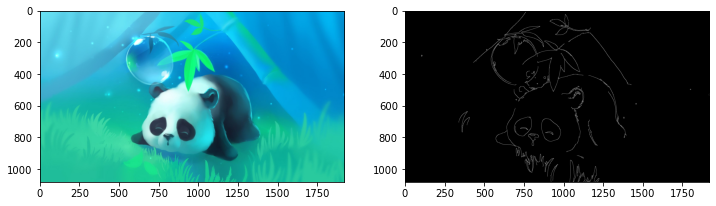

In [103]:
#Edge Detection
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
edged=cv2.Canny(img,10,200)
plt.imshow(edged,cmap='gray')

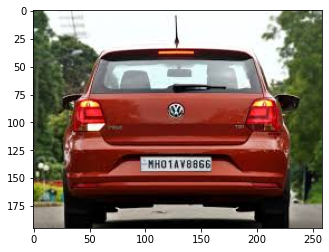

In [141]:
car_img=cv2.imread('/home/pkumari/Downloads/CNN-Industry_Apllication/SampleVideo/car_image1.jpg')
car_img=cv2.cvtColor(car_img,cv2.COLOR_BGR2RGB)
plt.imshow(car_img,cmap='gray')

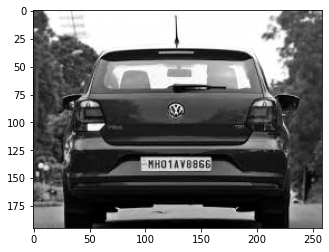

In [205]:
car_gray=cv2.cvtColor(car_img,cv2.COLOR_BGR2GRAY)
plt.imshow(car_gray,cmap='gray')

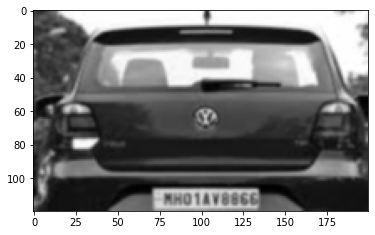

In [252]:
car_blur=cv2.GaussianBlur(car_gray[25:145,25:225],(3,3),0)
plt.imshow(car_blur,cmap='gray')

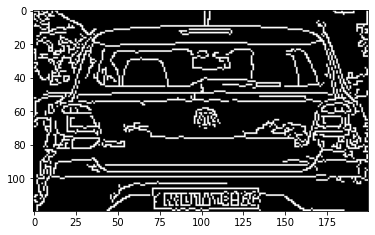

In [261]:
#Edge detectors
car_edge=cv2.Canny(car_gray[25:145,25:225],10,300)
plt.imshow(car_edge,cmap='gray')

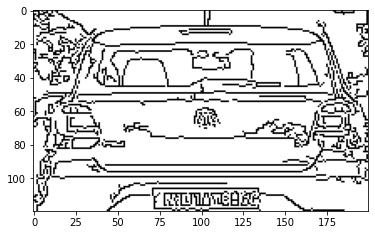

In [270]:
car_mod=255-car_edge
plt.imshow(car_mod,cmap='gray')

In [271]:
countours,_=cv2.findContours(car_mod,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [272]:
len(countours)

523

In [273]:
peri

11.656854152679443

In [284]:
rect_contours=[]
for c in countours:
    peri=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.01*peri,True)
    
    if len(approx)==4:
        rect_contours.append(approx)
        break

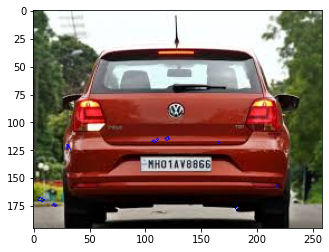

In [285]:
plt.imshow(cv2.drawContours(car_img,[rect_contours[0]],-1,(0,0,255),1))

In [286]:
mask=np.zeros(car_edge.shape)
mask=cv2.drawContours(mask,[rect_contours[0]],contourIdx=0,color=255,thickness=-1)

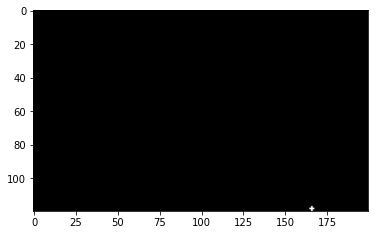

In [283]:
plt.imshow(mask,cmap='gray')

In [ ]:
num_plate=cv2.bitwise_and(img,img)